#### Erklärung MCMC
MCMC macht am meisten Sinn, wenn man die Posterior-Verteilung einer Wahrscheinlichkeitsverteilung approximieren möchte. Die Posterior-Verteilung ist die Verteilung der Parameter einer Wahrscheinlichkeitsverteilung, gegeben den Daten.

MCMC ist besonders nützlich, wenn die Posterior-Verteilung nicht analytisch bekannt ist oder wenn die Posterior-Verteilung schwer zu approximieren ist.

Hier sind einige Beispiele, in denen MCMC verwendet werden kann:

    Statistische Inferenz: MCMC kann verwendet werden, um die Parameter einer Wahrscheinlichkeitsverteilung zu schätzen, gegeben den Daten.
    Modellierung: MCMC kann verwendet werden, um Modelle zu entwickeln, die die Daten gut beschreiben.
    Optimierung: MCMC kann verwendet werden, um die optimale Lösung eines Problems zu finden.

Hier sind einige konkrete Beispiele für die Verwendung von MCMC:

    In der Medizin kann MCMC verwendet werden, um die Wahrscheinlichkeit einer Krankheit für einen Patienten zu schätzen, basierend auf den medizinischen Daten des Patienten.
    In der Finanzwirtschaft kann MCMC verwendet werden, um die Preise von Finanzinstrumenten zu schätzen, basierend auf den Marktdaten.
    In der Klimaforschung kann MCMC verwendet werden, um die Auswirkungen des Klimawandels zu modellieren, basierend auf den Beobachtungsdaten des Klimas.

MCMC ist ein mächtiges Werkzeug, das in vielen verschiedenen Bereichen verwendet werden kann.

### Fairness einer Münze
Ziel: wir wollen überprüfen, ob eine Münze fair ist           
-> grafik.png hat einen Durchschnitt von 0,5 und eine Standardabweichung von 0,1   
-> grafik.png = 12 und 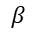 = 12  
50 Würfe -> 10 Kopf, 40 Zahl      



In [2]:
# Importieren von libabaries, für MCMC nutzen wir pymc
import matplotlib.pyplot as plt
import numpy as np
import pymc as pm
import scipy.stats as stats

plt.style.use("ggplot")

WARNING (pytensor.configdefaults): g++ not detected!  PyTensor will be unable to compile C-implementations and will default to Python. Performance may be severely degraded. To remove this warning, set PyTensor flags cxx to an empty string.
WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [5]:
"""
Definieren der Hauptfunktion
Anlegen der Prior-Parameter
Anzahl der durchgeführten Münzwurfversuche und der zurückgegebenen Köpfe festlegen
Festlegen, dass wir 100.000 Trials machen wollen
"""
if __name__ == '__main__':

    n = 50 #kopf
    z = 10 #zahl

    #prior parameters alpha and beta: priori Wahrscheinlichkeit fest, dass die Münze mit einer Wahrscheinlichkeit 
    #von p Kopf oder Zahl wirft. In Ihrem Code ist alpha = 12 und beta = 12. Dies bedeutet, dass Sie davon ausgehen, 
    #dass die Wahrscheinlichkeit für Kopf und Zahl gleich groß ist.
    alpha = 12
    beta = 12

    iterations = 100000

In [4]:
def create_mcmc_model(alpha, beta, n, z, iterations):
    # PyMC verwenden, um einen Modellkontext zu erstellen
    with pm.Model() as basic_model:
        # 1 Prior definieren mit einer Beta-Distribution
        theta = pm.Beta("theta", alpha=alpha, beta=beta)

        # 2 Münzwurf -> Bernoullifunktion
        y = pm.Binomial("y", n=n, p=theta, observed=z)

        # Start vom MCMC
        # 3 Benutzung einer  Maximum A Posteriori (MAP) optimisation als Anfangswert der MCMC
        start = pm.find_MAP()

        # 4 Wir benutzen den Metropolis Algorithmus
        step = pm.Metropolis()

        # 5 Hier werden die Ergebnisse gespeichert
        trace = pm.sample(
            draws=iterations,
            step=step,
            init=start,
            chains=1,
            random_seed=1,
            progressbar=True
        )
    return trace

#### Kommentar 1)

Der Kommentar "# Prior definieren mit einer Beta-Distribution" bedeutet, dass der Parameter theta im Modell mit einer Beta-Verteilung modelliert wird. Die Beta-Verteilung ist eine kontinuierliche Wahrscheinlichkeitsverteilung, die häufig verwendet wird, um die Wahrscheinlichkeit von Ereignissen zu modellieren, deren Wahrscheinlichkeit zwischen 0 und 1 liegt.

In diesem Fall ist theta die Wahrscheinlichkeit für Kopf bei einem Münzwurf. Die Beta-Verteilung wird verwendet, um die a priori Wahrscheinlichkeit für theta zu modellieren. Das bedeutet, dass die Beta-Verteilung die Wahrscheinlichkeit beschreibt, dass theta einen bestimmten Wert annimmt, bevor die Beobachtungen bekannt sind.

Die Parameter alpha und beta der Beta-Verteilung legen die a priori Wahrscheinlichkeit fest, dass theta einen bestimmten Wert annimmt. Die Werte von alpha und beta beeinflussen die Form der Beta-Verteilung.

Wenn alpha und beta gleich groß sind, dann ist die Beta-Verteilung gleichverteilt. Das bedeutet, dass alle Werte von theta gleich wahrscheinlich sind.

----------------------------------------------------------------------

#### Kommentar 2)

Die Bernoulliverteilung ist eine diskrete Wahrscheinlichkeitsverteilung, die nur zwei mögliche Ergebnisse zulässt: Erfolg oder Misserfolg. In diesem Fall ist der Erfolg ein Kopf und der Misserfolg eine Zahl.

Die Bernoulliverteilung wird durch zwei Parameter beschrieben: p, die Wahrscheinlichkeit für Erfolg, und q, die Wahrscheinlichkeit für Misserfolg.

In diesem Fall ist p die Wahrscheinlichkeit, dass die Münze mit einer Wahrscheinlichkeit von theta Kopf wirft.


Beispiel:

Angenommen, wir führen 50 Münzwürfe durch. Die Wahrscheinlichkeit, dass die Münze mit einer Wahrscheinlichkeit von 0,5 Kopf wirft, ist gegeben durch die folgende Formel:

P(z=25|50,0.5) = 50C25 * 0.5^25 * (1-0.5)^(50-25)


---------------------------------------------

#### Kommentar 3)
Die MAP-Optimierung ist ein Verfahren, das den Wert eines Parameters so bestimmt, dass die Wahrscheinlichkeit der Beobachtung maximiert wird.

In diesem Fall ist der Parameter theta die Wahrscheinlichkeit für Kopf bei einem Münzwurf. Die MAP-Optimierung wird verwendet, um den Wert von theta zu bestimmen, der die Wahrscheinlichkeit der Beobachtung, in diesem Fall die Anzahl der Köpfe in n Münzwürfen, maximiert.

Die MAP-Optimierung wird durch die folgende Formel bestimmt:

theta_MAP = argmax_theta P(y|theta)

wobei:

    theta_MAP der Wert von theta ist, der die Wahrscheinlichkeit der Beobachtung maximiert
    y die Beobachtung ist, in diesem Fall die Anzahl der Köpfe in n Münzwürfen

Die MAP-Optimierung wird verwendet, um einen Anfangswert für den MCMC-Algorithmus zu bestimmen, der die Wahrscheinlichkeit der Beobachtung maximiert. Dies kann dazu beitragen, dass der MCMC-Algorithmus schneller konvergiert.

Beispiel

Angenommen, wir führen 50 Münzwürfe durch und erhalten 25 Köpfe. Die MAP-Optimierung wird verwendet, um den Wert von theta zu bestimmen, der die Wahrscheinlichkeit der Beobachtung, in diesem Fall 25 Köpfe in 50 Münzwürfen, maximiert.

Die MAP-Optimierung ergibt, dass theta_MAP etwa 0,5 ist. Das bedeutet, dass die Münze mit einer Wahrscheinlichkeit von etwa 50 % für Kopf wirft.

Dieser Anfangswert kann dann für den MCMC-Algorithmus verwendet werden. Der MCMC-Algorithmus wird dann verwendet, um die Posterior-Verteilung für theta zu approximieren.

Zusammenfassung

Der Kommentar "# Benutzung einer Maximum A Posteriori (MAP) optimisation als Anfangswert der MCMC" bedeutet, dass der Anfangswert für den MCMC-Algorithmus mit der MAP-Optimierung bestimmt wird. Die MAP-Optimierung wird verwendet, um den Wert von theta zu bestimmen, der die Wahrscheinlichkeit der Beobachtung maximiert. Dies kann dazu beitragen, dass der MCMC-Algorithmus schneller konvergiert.

-------------------------

#### Kommentar 4)

Der Metropolis-Algorithmus ist ein Markov-Ketten-Monte-Carlo-Algorithmus, der verwendet wird, um die Posterior-Verteilung einer Wahrscheinlichkeitsverteilung zu approximieren.

Der Metropolis-Algorithmus funktioniert folgendermaßen:

    Starte mit einem beliebigen Wert für den Parameter, in diesem Fall theta.
    Wähle einen neuen Wert für den Parameter zufällig aus.
    Berechne die Akzeptanzwahrscheinlichkeit für den neuen Wert.
    Wenn die Akzeptanzwahrscheinlichkeit größer als 0 ist, dann akzeptiere den neuen Wert. Sonst bleibe beim alten Wert.
    Wiederhole die Schritte 2-4, bis eine ausreichende Anzahl von Werten für den Parameter generiert wurde.

Die Akzeptanzwahrscheinlichkeit für den neuen Wert wird durch die folgende Formel berechnet:

A = min(1, P(y|theta_new) / P(y|theta_old))

wobei:

    theta_new der neue Wert für den Parameter ist
    theta_old der alte Wert für den Parameter ist
    y die Beobachtung ist

Die Akzeptanzwahrscheinlichkeit ist eine Wahrscheinlichkeit, dass der neue Wert akzeptiert wird. Wenn die Akzeptanzwahrscheinlichkeit groß ist, dann ist der neue Wert wahrscheinlicher als der alte Wert.

Vorteile des Metropolis-Algorithmus

Der Metropolis-Algorithmus hat folgende Vorteile:

    Er ist relativ einfach zu implementieren.
    Er ist relativ robust gegenüber der Wahl der Parameter des MCMC-Algorithmus.
    Er kann verwendet werden, um die Posterior-Verteilung einer beliebigen Wahrscheinlichkeitsverteilung zu approximieren.

Nachteile des Metropolis-Algorithmus

Der Metropolis-Algorithmus hat folgende Nachteile:

    Er kann langsam konvergieren, wenn die Posterior-Verteilung stark gesättigt ist.
    Er kann zu einer Verzerrung der Posterior-Verteilung führen, wenn die Akzeptanzwahrscheinlichkeit zu klein ist.

Zusammenfassung

Der Kommentar "# Wir benutzen den Metropolis Algorithmus" bedeutet, dass der MCMC-Algorithmus im Code mit dem Metropolis-Algorithmus implementiert wird. Der Metropolis-Algorithmus ist ein Markov-Ketten-Monte-Carlo-Algorithmus, der verwendet wird, um die Posterior-Verteilung einer Wahrscheinlichkeitsverteilung zu approximieren.

------------------------------

#### Kommentar 5)

Das Argument draws legt die Anzahl der Samples fest, die generiert werden sollen. In diesem Fall ist das Argument draws auf iterations gesetzt, was bedeutet, dass iterations Samples generiert werden.

Das Argument step legt die Größe der Vorschlagsverteilung fest. Die Vorschlagsverteilung ist eine Verteilung, aus der neue Werte für den Parameter gezogen werden. Das Argument step steuert, wie viel sich der Wert des Parameters zwischen den Samples ändern kann.

Das Argument init legt die Anfangswerte für den Parameter fest. In diesem Fall ist das Argument init auf start gesetzt, was bedeutet, dass der MCMC-Algorithmus mit den Werten in der Liste start beginnt.

Das Argument chains legt die Anzahl der Ketten fest, die ausgeführt werden sollen. Der MCMC-Algorithmus arbeitet, indem er mehrere Ketten parallel ausführt. Dies kann dazu beitragen, die Genauigkeit der Ergebnisse zu verbessern. In diesem Fall ist das Argument chains auf 1 gesetzt, was bedeutet, dass nur eine Kette ausgeführt wird.

Das Argument random_seed legt den zu verwendenden Zufallszahlengenerator fest. Der Zufallszahlengenerator steuert den Zufallszahlengenerator, der vom MCMC-Algorithmus verwendet wird. Dies kann nützlich sein, um die Ergebnisse reproduzierbar zu machen. In diesem Fall ist das Argument random_seed auf 1 gesetzt, was bedeutet, dass derselbe Zufallszahlengenerator verwendet wird, wenn der Code jedes Mal ausgeführt wird.

Das Argument progressbar legt fest, ob eine Fortschrittsleiste angezeigt werden soll oder nicht. Die Fortschrittsleiste ist ein visuelles Indikator, der anzeigt, wie weit der MCMC-Algorithmus fortgeschritten ist. In diesem Fall ist das Argument progressbar auf True gesetzt, was bedeutet, dass eine Fortschrittsleiste angezeigt wird.

Zusammenfassung

Der Kommentar "# Hier werden die Ergebnisse gespeichert" bedeutet, dass die Ergebnisse des MCMC-Algorithmus in der Variable trace gespeichert werden. Die Variable trace ist ein Dictionary, das alle Samples enthält, die vom MCMC-Algorithmus generiert wurden.

Die Argumente draws, step, init, chains, random_seed und progressbar legen die Parameter des MCMC-Algorithmus fest. Diese Parameter können verwendet werden, um die Genauigkeit und Effizienz des Algorithmus zu beeinflussen.

---------------------------

In [5]:
def plot_mcmc_execution(trace, bins, alpha, beta):
    # Histogram der Posterior Density Distribution plotten
    plt.hist(
        trace['posterior']['theta'][0].to_numpy(), bins,
        histtype="step", density=True,
        label="Posterior (MCMC)", color="red"
    )

    # Prior plotten
    x = np.linspace(0, 1, 100)
    plt.plot(
        x, stats.beta.pdf(x, alpha, beta),
        "--", label="Prior", color="blue"
    )


    # Graph beschriften
    plt.legend(title="Parameters", loc="best")
    plt.xlabel("$\\theta$, Fairness")
    plt.ylabel("Density")
    plt.show()

    # Traceplot
    pm.plot_trace(trace)

    # Graph anzeigen
    plt.show()

Erklärung der einzelnen Zeilen:

1.    def plot_mcmc_execution(trace, bins, alpha, beta): Diese Zeile definiert eine Funktion namens plot_mcmc_execution(), die vier Argumente nimmt: trace, bins, alpha und beta. Das Argument trace ist ein Dictionary, das die von dem MCMC-Algorithmus generierten Samples enthält. Das Argument bins ist die Anzahl der Bins, die für das Histogramm verwendet werden sollen. Die Argumente alpha und beta sind die Parameter der Prior-Verteilung.

2.    plt.hist(trace['posterior']['theta'][0].to_numpy(), bins, histtype="step", density=True, label="Posterior (MCMC)", color="red"): Diese Zeile plottet das Histogramm der Posterior-Dichteverteilung. Die Expression trace['posterior']['theta'][0].to_numpy() extrahiert die Samples aus dem Dictionary posterior des Dictionary trace und konvertiert sie in ein NumPy-Array. Das Argument histtype="step" legt fest, dass das Histogramm als Stufenfunktion geplottet werden soll. Das Argument density=True legt fest, dass die Dichte der Verteilung geplottet werden soll, anstatt die Zählungen. Die Argumente label="Posterior (MCMC)", color="red" fügen einen Label und die Farbe des Histogramms hinzu.

3.    x = np.linspace(0, 1, 100): Diese Zeile erstellt ein Array mit 100 gleichmäßig verteilten Punkten zwischen 0 und 1. Das Array x wird verwendet, um die Prior-Verteilung zu evaluieren.

4.    plt.plot(x, stats.beta.pdf(x, alpha, beta), "-", label="Prior", color="blue"): Diese Zeile plottet die Prior-Verteilung. Die Expression stats.beta.pdf(x, alpha, beta) evaluiert die Prior-Verteilung an jedem Punkt im Array x. Das Argument "-" legt fest, dass die Verteilung als Linie geplottet werden soll. Die Argumente label="Prior", color="blue" fügen einen Label und die Farbe der Verteilung hinzu.

5.    plt.legend(title="Parameters", loc="best"): Diese Zeile fügt eine Legende zum Graphen hinzu. Das Argument title="Parameters" legt den Titel der Legende fest. Das Argument loc="best" legt die Position der Legende fest.

6.    plt.xlabel("<span class="math-inline">\\\\theta</span>, Fairness"): Diese Zeile fügt einen Label für die x-Achse hinzu. Der Label weist darauf hin, dass die x-Achse den Parameter θ darstellt, der mit Fairness in Verbindung steht.

7.    plt.ylabel("Density"): Diese Zeile fügt einen Label für die y-Achse hinzu. Der Label weist darauf hin, dass die y-Achse die Dichte der Verteilung darstellt.

8.    plt.show(): Diese Zeile zeigt den Graphen an.


----------------------------

Sequential sampling (1 chains in 1 job)
Metropolis: [theta]


Sampling 1 chain for 1_000 tune and 100_000 draw iterations (1_000 + 100_000 draws total) took 74 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks


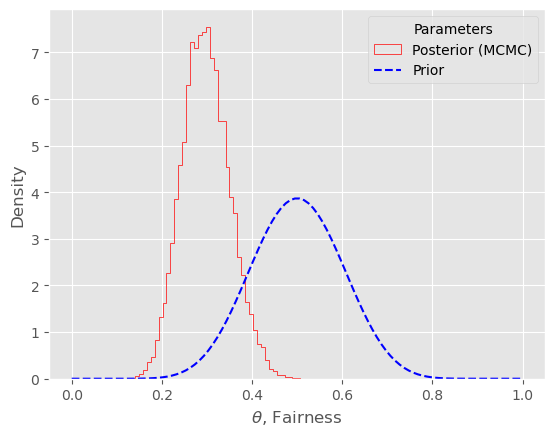

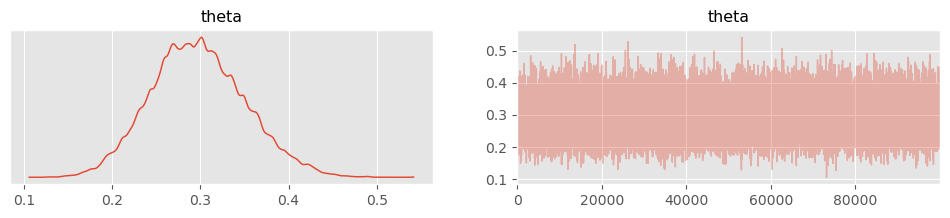

In [6]:
if __name__ == '__main__':


    n = 50
    z = 10
    alpha = 12
    beta = 12


    iterations = 100000

    # Anzahl an Bins im Histogramm
    bins=50

    mcmc_model = create_mcmc_model(alpha, beta, n, z, iterations)
    plot_mcmc_execution(mcmc_model, bins, alpha, beta)

Posterior Denistity Distribution bei 1.000.000 Iterationen:
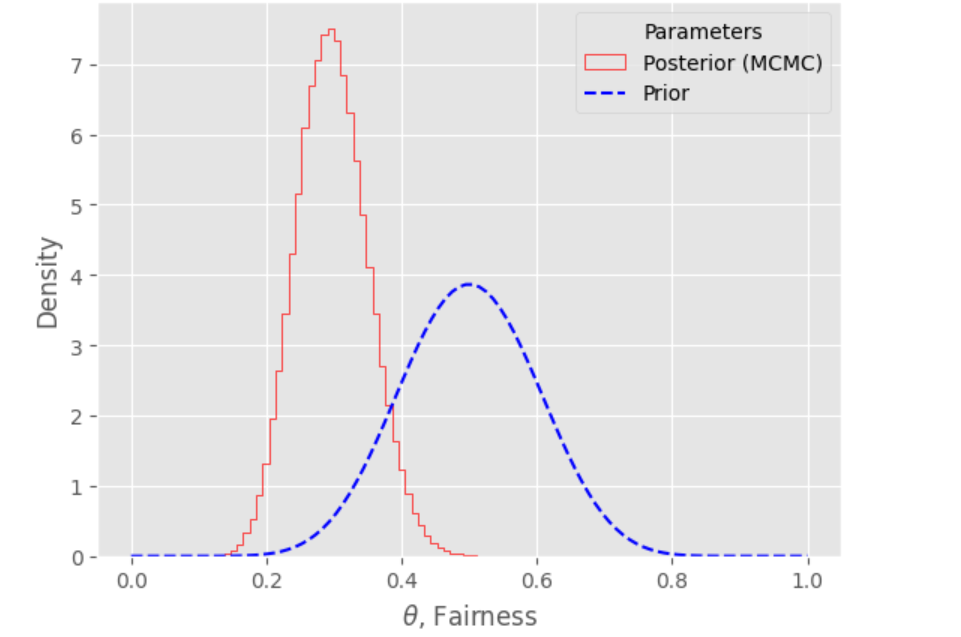